# 1. Introduction to Baby Names Data

What’s in a name? That which we call a rose, By any other name would smell as sweet.

In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing.

Let us start by reading the data.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
bnames=pd.read_csv('C:/Users/Shades/Documents/DataCamp/names.csv.gz')
bnames.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


# 2. Exploring Trends in Names
One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!

In [104]:
# bnames_top5: A dataframe with top 5 popular male and female names for the decade
bnames_decade = bnames.loc[bnames['year'] > 2010]
bnames_decade = bnames_decade.groupby(['sex','name'], as_index=False)['births'].sum()
bnames_top5 = bnames_decade.sort_values(['sex','births'], ascending=[True, False]).groupby('sex').head().reset_index(drop=True)
print(bnames_top5.head())

  sex      name  births
0   F      Emma  121375
1   F    Sophia  117352
2   F    Olivia  111691
3   F  Isabella  103947
4   F       Ava   94507


# 3. Proportion of Births
While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.

In [105]:
bnames2 = bnames.copy()
# Compute the proportion of births by year and add it as a new column
total_births = bnames2.groupby(['year'])['births'].transform('sum')
bnames2['prop_births'] = bnames2['births']/total_births
print(bnames2.head())

        name sex  births  year  prop_births
0       Mary   F    7065  1880     0.035065
1       Anna   F    2604  1880     0.012924
2       Emma   F    2003  1880     0.009941
3  Elizabeth   F    1939  1880     0.009624
4     Minnie   F    1746  1880     0.008666


# 4. Popularity of Names
Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names Elizabeth, and Deneen, and inspecting the underlying trends for any interesting patterns!

Number of picks for name Elizabeth:
3
Number of picks for name Deneen:
1


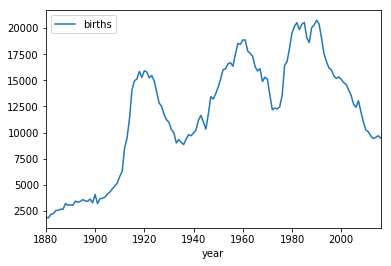

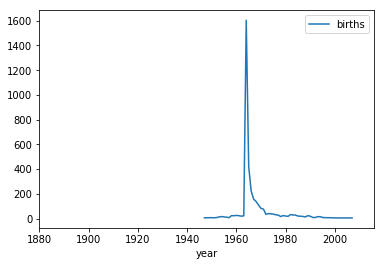

In [106]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
import numpy as np

def plot_trends(name, sex):
    # -- YOUR CODE HERE --
    data = bnames[(bnames.name == name) & (bnames.sex == sex)]
    ax = data.plot(x = 'year', y = 'births')
    ax.set_xlim(1880, 2016)
    return ax

# Plot trends for Elizabeth and Deneen 
# -- YOUR CODE HERE --
for name in ['Elizabeth', 'Deneen']:
    plot_trends(name, 'F')
    
# How many times did these female names peak?
num_peaks_elizabeth = 3 # len(find_peaks_cwt(np.array(bnames[(bnames.name == 'Elizabeth') & (bnames.sex == 'F')]['births']), np.arange(1, 40)))
print('Number of picks for name Elizabeth:')
print(num_peaks_elizabeth)
num_peaks_deneen = 1 # len(find_peaks_cwt(np.array(bnames[(bnames.name == 'Deneen') & (bnames.sex == 'F')]['births']), np.arange(1, 40)))
print('Number of picks for name Deneen:')
print(num_peaks_deneen)


# 5. Trendy vs. Stable Names
Based on the plots we created earlier, we can see that Elizabeth is a fairly stable name, while Deneen is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down.

There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name Joe had the proportions 0.1, 0.2, 0.1, 0.1, then the trendiness measure would be 0.2/(0.1 + 0.2 + 0.1 + 0.1) which equals 0.5.

Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.

In [107]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names
names = pd.DataFrame()
name_and_sex_grouped = bnames.groupby(['name', 'sex'])
names['total'] = name_and_sex_grouped['births'].sum()
names['max'] =name_and_sex_grouped['births'].max()
names['trendiness'] = names['max']/names['total']
top10_trendy_names = names.loc[names['total'] > 1000].sort_values('trendiness', ascending=False).head(10).reset_index()
print(top10_trendy_names)

       name sex  total   max  trendiness
0  Christop   M   1082  1082    1.000000
1   Royalty   F   1057   581    0.549669
2     Kizzy   F   2325  1116    0.480000
3    Aitana   F   1203   564    0.468828
4    Deneen   F   3602  1604    0.445308
5    Moesha   F   1067   426    0.399250
6    Marely   F   2527  1004    0.397309
7     Kanye   M   1304   507    0.388804
8  Tennille   F   2172   769    0.354052
9   Kadijah   F   1411   486    0.344437


# 6. Bring in Mortality Data
So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the SSA provides detailed actuarial life tables by birth cohorts.
You can read the documentation for the lifetables to understand what the different columns mean. The key column of interest to us is lx, which provides the number of people born in a year who live upto a given age. The probability of being alive can be derived as lx by 100,000.

Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?"

Let us use this data and plot it to get a sense of the mortality distribution!

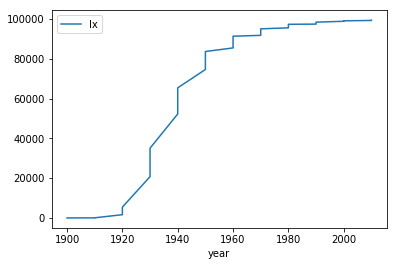

In [23]:
lifetables=pd.read_csv('C:/Users/Shades/Documents/DataCamp/lifetables.csv')
#extract data for the ones alive in 2016
lifetables_2016=lifetables.loc[(lifetables['year'])+(lifetables['age'])==2016]
#plotting the mortality distribution: year vs lx
lifetables_2016.plot(x='year',y='lx')
plt.show()

# 7. Smoothen the Curve!
We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of lx, between the years 1900 and 2016.

In [108]:
import numpy as np
year = np.arange(1900,2016)
mf = {'M': pd.DataFrame(),'F':pd.DataFrame()}

for sex in ['M','F']:
    d=lifetables_2016[lifetables_2016['sex']==sex][['year','lx']]
    mf[sex]=d.set_index('year').reindex(year).interpolate().reset_index()
    mf[sex]['sex']=sex
    
lifetable_2016_final=pd.concat(mf,ignore_index= True)
lifetable_2016_final        

,year,lx,sex
0,1900,0.0,F
1,1901,6.1,F
2,1902,12.2,F
3,1903,18.3,F
4,1904,24.4,F
5,1905,30.5,F
6,1906,36.6,F
7,1907,42.7,F
8,1908,48.8,F
9,1909,54.9,F


# 8. Distribution of People Alive by Name
Now that we have all the required data, we need a few helper functions to help us with our analysis.

The first function we will write is get_data,which takes name and sex as inputs and returns a data frame with the distribution of number of births and number of people alive by year.

The second function is plot_name which accepts the same arguments as get_data, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.

Using these functions, we will plot the distribution of births for boys named Joseph and girls named Brittany.

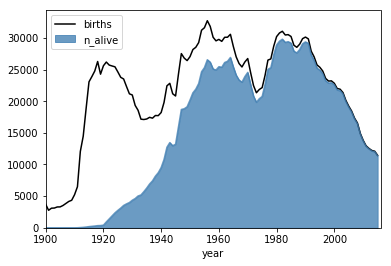

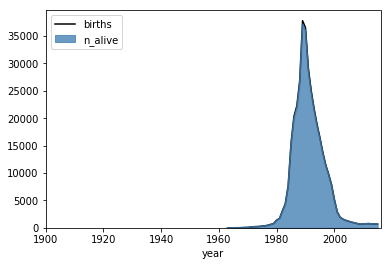

In [109]:
def get_data(name, sex):
    name_sex = ((bnames['name'] == name) & 
                (bnames['sex'] == sex))
    #print(name_sex)
    data = bnames[name_sex].merge(lifetable_2016_final)
    #print(data.columns)
    data['n_alive'] = data['lx']/(10**5)*data['births']
    return data
    

def plot_data(name, sex):
    fig, ax = plt.subplots()
    dat = get_data(name, sex)
    dat.plot(x = 'year', y = 'births', ax = ax, 
               color = 'black')
    dat.plot(x = 'year', y = 'n_alive', 
              kind = 'area', ax = ax, 
              color = 'steelblue', alpha = 0.8)
    ax.set_xlim(1900, 2016)
    return 
    
# Plot the distribution of births and number alive for Joseph and Brittany
plot_data("Joseph", "M")
plot_data("Brittany","F")  

# 9. Estimate Age
In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named Gertrude. Any guesses on how old a person with this name is? How about a male named William?

In [132]:
from wquantiles import quantile

def estimate_age(name,sex):
    data=get_data(name,sex)
    qs=[0.75,0.5,0.25]
    quantiles = [2016-int(quantile(data.year,data.n_alive,q)) for q in qs]
    result=dict(zip(['q25','q50','q75'],quantiles))
    result['p_alive']=round((data.n_alive.sum()/data.births.sum()*100),2)
    result['sex']=sex
    result['name']=name
    return pd.Series(result)


estimate_age('Gertrude','F')
    

q25              70
q50              80
q75              89
p_alive       18.73
sex               F
name       Gertrude
dtype: object

# 10. Median Age of Top 10 Female Names
In the previous section, we estimated the age of a female named Gertrude. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!

In [139]:
bnames_top_10_f=bnames.groupby(['name','sex'],as_index=False)['births'].sum().sort_values('births',ascending=False).query('sex=="F"').head(10)
bnames_top_10_f

estimates=pd.concat([estimate_age(name,'F') for name in bnames_top_10_f.name],axis=1)
median=estimates.T.sort_values('q50').reset_index(drop=True)
median

,q25,q50,q75,p_alive,sex,name
0,20,30,38,86.05,F,Sarah
1,23,38,58,74.49,F,Elizabeth
2,31,38,44,96.35,F,Jennifer
3,52,59,65,85.8,F,Susan
4,54,63,71,76.75,F,Patricia
5,53,64,74,54.41,F,Mary
6,57,64,69,83.43,F,Linda
7,51,64,75,49.47,F,Margaret
8,58,66,74,70.61,F,Barbara
9,64,75,85,35.81,F,Dorothy
